### 1.导入模块

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams["font.sans-serif"]=['SimHei']#用来正常显示中文标签  
plt.rcParams["axes.unicode_minus"]=False#用来正常显示负号 

### 2.导入数据和数据预处理

#### 2.1basket数据

导入数据

In [3]:
basket = pd.read_csv('D:/Learn/课程/第三学期/python数学运算与数据可视化/大作业/数据/Basket.csv')
basket['SDATE']=pd.to_datetime(basket['SDATE'])
basket.isnull().any()

SDATE         False
STORE_CODE    False
POS_NO        False
BASK_CODE     False
BASK_SPEND    False
dtype: bool

异常值检测

In [4]:
spend=basket['BASK_SPEND']

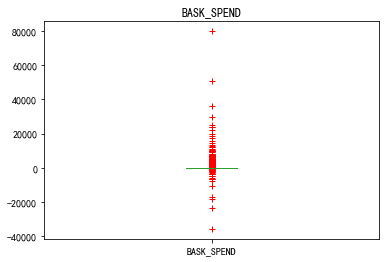

In [5]:
spend.plot(kind='box',title='BASK_SPEND',sym='r+')   #从箱线图可以看出有销售金额小于0和远大于平均值的异常值

In [6]:
spend.describe()

count    571552.000000
mean         38.973310
std         209.038276
min      -35940.000000
25%           9.000000
50%          19.900000
75%          44.700000
max       79920.000000
Name: BASK_SPEND, dtype: float64

删除异常值

In [7]:
basket_new1=basket[basket['BASK_SPEND']>0]  #剔除basket中bask_spend列小于0的行
basket_new1.head()

,SDATE,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018-06-01,D007,3,250458,8.0
1,2018-06-01,D007,3,250200,32.7
2,2018-06-01,D007,1,161068,16.8
3,2018-06-01,D007,8,5325,30.4
4,2018-06-01,D007,8,5361,191.3


In [8]:
basket_new2=basket_new1[basket_new1['BASK_SPEND']<80]   #剔除basket中bask_spend列大于80的行

In [9]:
basket_new2.duplicated().sum()#查看是否有重复值

0

#### 2.2item数据

导入数据

In [10]:
item = pd.read_csv('D:/Learn/课程/第三学期/python数学运算与数据可视化/大作业/数据/item.csv')
item['SDATE']=pd.to_datetime(item['SDATE'])
item.isnull().any()

SDATE              False
STORE_CODE         False
POSID              False
BASK_CODE          False
PROD_CODE          False
ITEM_QUANTITY      False
ITEM_SPEND         False
NORMAL_PRICE       False
DISCOUNT_TYPE      False
DISCOUNT_AMOUNT    False
dtype: bool

In [11]:
item.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


异常值检测

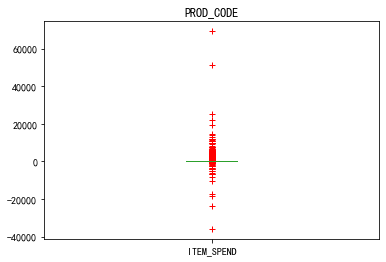

In [12]:
item_spend=item['ITEM_SPEND']
item_spend.plot(kind='box',title='PROD_CODE',sym='r+')         #从箱线图可以看出也是有异常值存在

In [13]:
item_spend.describe()

count    1.732761e+06
mean     1.285536e+01
std      1.022148e+02
min     -3.594000e+04
25%      3.800000e+00
50%      7.000000e+00
75%      1.200000e+01
max      6.912000e+04
Name: ITEM_SPEND, dtype: float64

删除异常值

In [14]:
item_new1=item[item['ITEM_SPEND']>0]  #剔除basket中bask_spend列小于0的行
basket_new1.head()

,SDATE,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018-06-01,D007,3,250458,8.0
1,2018-06-01,D007,3,250200,32.7
2,2018-06-01,D007,1,161068,16.8
3,2018-06-01,D007,8,5325,30.4
4,2018-06-01,D007,8,5361,191.3


In [15]:
item_new2=item_new1[item_new1['ITEM_SPEND']<20000]   #剔除basket中bask_spend列大于20000的行

In [16]:
basket_new2.duplicated().sum()#查看是否有重复值

0

### 3数据分析

#### 3.1商店销售额分析

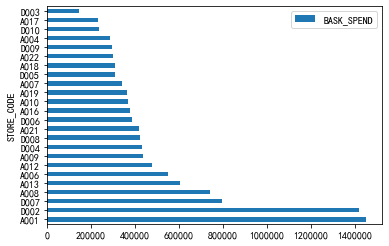

In [17]:
a=basket_new2.groupby('STORE_CODE')['BASK_SPEND'].sum().reset_index().sort_values(by = 'BASK_SPEND',ascending = False)#商店按消费额大小排序
a.set_index('STORE_CODE',inplace=True)
a.plot(kind='barh')                       #从条形图可以看出A001商店的销售额最大

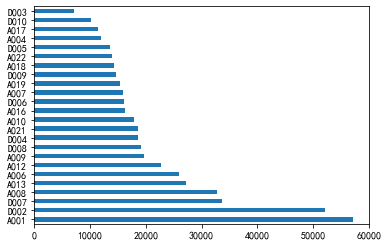

In [18]:
b=basket_new2.loc[:,'STORE_CODE'].value_counts()#商店按结账次数大小排序
b.plot(kind='barh')       #A001商店的结账次数也最大

In [19]:
#将时间拆分成年月方便根据时间对商店的销售额进行分析
basket_new2['year'] = basket_new2['SDATE'].dt.year          
basket_new2['month'] = basket_new2['SDATE'].dt.month
basket_new2['day']= basket_new2['SDATE'].values.astype('datetime64[D]')#方便后续的分析，新增加年份列和月份列

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [20]:
#按照年份、月份对销售子数据集进行分组求和
sales_month = basket_new2[['SDATE','BASK_SPEND','month']]
sales_month = sales_month.groupby(['month','SDATE']).sum()
sales_month.head()

BASK_SPEND
month SDATE                 
6     2018-06-01   372014.79
      2018-06-02   384824.51
      2018-06-03   358051.25
      2018-06-04   306442.13
      2018-06-05   334589.50

In [21]:
# 整体销售情况子数据集，包含下单日期、销售额、年份、月份信息
sales_data = basket_new2[['SDATE','BASK_SPEND','month','day']]
#按照年份、月份对销售子数据集进行分组求和
sales_month = sales_data.groupby(['month','day']).sum()
sales_month.style.background_gradient()# 颜色越深，销售额越高
#按周六日呈周期性递增态势

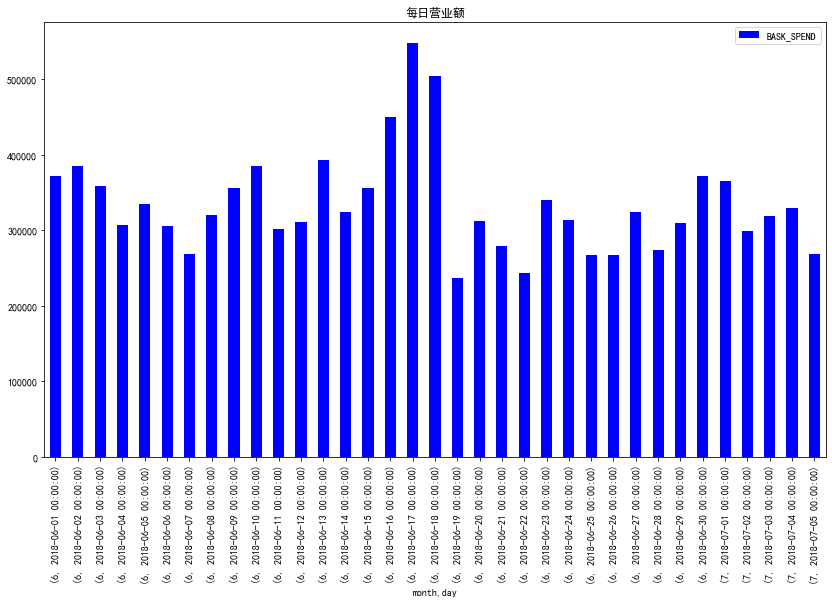

In [22]:
sales_month.plot(kind='bar',color="blue",title="每日营业额",figsize=(14,8))

In [23]:
# 统计每个商店的pos机
S_pos =basket_new2.groupby(by="STORE_CODE")
Shop_pos = S_pos["POS_NO"]
Shop_pos.unique()

STORE_CODE
A001               [6, 9, 3, 10, 2, 1, 5, 4]
A004                               [2, 4, 1]
A006                               [2, 4, 1]
A007                               [1, 8, 2]
A008                      [3, 1, 8, 2, 6, 4]
A009                               [1, 2, 8]
A010                               [2, 8, 3]
A012                            [2, 3, 8, 1]
A013                         [2, 8, 6, 4, 1]
A016                               [1, 2, 3]
A017                                  [1, 8]
A018                               [1, 2, 4]
A019                               [1, 2, 3]
A021                            [2, 3, 4, 1]
A022                                  [2, 1]
D002    [4, 1, 5, 8, 6, 7, 2, 13, 20, 19, 9]
D003                                  [2, 1]
D004                               [1, 4, 2]
D005                               [2, 3, 4]
D006                               [3, 2, 1]
D007                            [3, 1, 8, 4]
D008                               [1, 4, 2]

In [24]:
#统计商品的种类
Shop_code = basket_new2["BASK_CODE"].count()

#### 3.2顾客分析

顾客消费区间分析

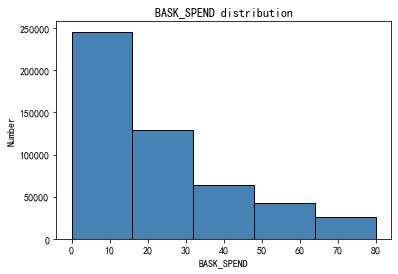

In [25]:
plt.hist(x = basket_new2.BASK_SPEND, # 指定绘图数据
          bins = 5, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色          
        )
# 添加x轴和y轴标签
plt.xlabel('BASK_SPEND')
plt.ylabel('Number')

plt.title('BASK_SPEND distribution')
 # 显示图形
plt.show()

#### 3.3产品分析

In [26]:
item_new2['year'] = item_new2['SDATE'].dt.year          
item_new2['month'] = item_new2['SDATE'].dt.month
item_new2['day']= item_new2['SDATE'].values.astype('datetime64[D]')#方便后续的分析，新增加年份列和月份列

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

In [27]:
#按商品货号分组，对商品数量进行求和，从大到小进行排序，得到销售量前十的商品
a=item_new2.groupby('PROD_CODE')['ITEM_QUANTITY'].sum().reset_index().sort_values(by = 'ITEM_QUANTITY',ascending = False)#商店按消费额大小排序
a.head(10)

,PROD_CODE,ITEM_QUANTITY
8528,149413,39931.00
5316,86772,31365.00
17200,220834,25704.00
1478,7133,23028.00
3883,61623,21828.00
7131,124556,19907.00
13768,205540,19313.00
301,1152,19183.00
12011,194690,18151.51
7129,124554,16681.00


In [28]:
#按商品货号分组，对销售金额进行求和，从大到小进行排序，得到交易额前十的商品
item_new2['sales'] = item_new2['ITEM_SPEND']
b=item_new2.groupby('PROD_CODE')['sales'].sum().sort_values(ascending=False)
b.head(10)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


PROD_CODE
7137      380783.50
7133      289784.00
136839    281211.40
149413    173820.33
1239      149153.20
154900    141034.70
220834    127622.90
21835     114483.25
88160     103467.20
3971       84972.00
Name: sales, dtype: float64

In [29]:
#客单价，即平均交易金额，是指平均每个客户交易金额，客单价等于成交金额/成交用户数。
#销售额是由客单价和用户数所决定的，要提升产品的销售额，除了尽可能多地吸引客流，增加顾客交易次数以外，提高客单价也是非常重要的途径。
sumPrice=item_new2['sales'].sum()
countID=item_new2['SDATE'].count()
avgPrice = sumPrice/countID
print(avgPrice)

12.939814941439838


In [30]:
c=item_new2.groupby('DISCOUNT_TYPE')['ITEM_SPEND'].sum().reset_index().sort_values(by = 'ITEM_SPEND',ascending = False)#销售量按照折扣进行分组并进行大小排序
c

,DISCOUNT_TYPE,ITEM_SPEND
3,n,1.459514e+07
4,p,5.330779e+06
2,m,2.104000e+06
7,v,1.910762e+05
8,x,9.161940e+04
5,q,4.618240e+04
0,Z,2.479515e+04
6,s,3.573290e+03
1,h,2.150000e+01


In [31]:
d=item_new2.groupby('DISCOUNT_TYPE')['ITEM_QUANTITY'].sum().reset_index().sort_values(by = 'ITEM_QUANTITY',ascending = False)#销售量按照折扣进行分组并进行大小排序
d

,DISCOUNT_TYPE,ITEM_QUANTITY
3,n,1665457.065
4,p,511298.851
2,m,292640.872
7,v,13264.000
8,x,9687.000
0,Z,2164.472
5,q,1122.000
6,s,883.006
1,h,1.000


In [32]:
grouped_Customer = item_new2[['BASK_CODE','SDATE', 'ITEM_QUANTITY', 'sales', 'month']].sort_values(['SDATE']).groupby('BASK_CODE')

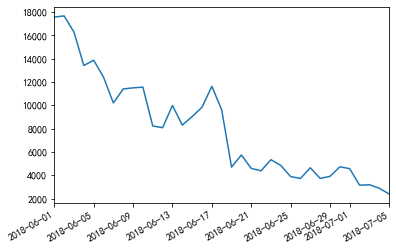

In [33]:
grouped_Customer.min().SDATE.value_counts().plot()   #用户的第一次购买日期分布，可以看出在7月之后用户增长缓慢

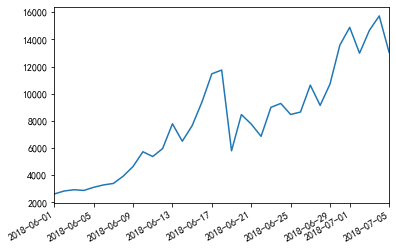

In [34]:
grouped_Customer.max().SDATE.value_counts().plot()   #用户最后一次购买日期分布,发现用户基本没有流失，也验证了每年销售额的增长趋势

In [35]:
# 统计每个客户第一次和最后一次购买记录
Customer_life = grouped_Customer.SDATE.agg(['min','max'])
# 查看只有一次购买记录的顾客数量，第一次和最后一次是同一条记录，则说明购买只有一次(这里将一个购物篮看做一个顾客)
(Customer_life['min'] == Customer_life['max']).value_counts()

False    169535
True     111281
dtype: int64

#### 3.4RFM模型分析

R是指用户的最近一次消费时间，这个指标与用户流失和复购直接相关

F是指用户下单频率，反应用户的消费活跃度

M是用户消费金额，反应用户对商店贡献的价值

（1）构建RFM表

In [36]:
rfm = item_new2.pivot_table(index='BASK_CODE',
                            values = ["ITEM_QUANTITY","sales","SDATE"],
                            aggfunc={"ITEM_QUANTITY":"sum","sales":"sum","SDATE":"max"})

# 所有用户最大的交易日期为标准，求每笔交易的时间间隔即为R
rfm['R'] = (rfm.SDATE.max() - rfm.SDATE)/np.timedelta64(1,'D')
# 每个客户的总销量即为F，总销售额即为M
rfm.rename(columns={'ITEM_QUANTITY':'F','sales':'M'},inplace = True)
rfm.head()

,F,SDATE,M,R
BASK_CODE,,,,
961,1.0,2018-06-18,25.0,17.0
962,11.0,2018-06-18,132.1,17.0
964,2.0,2018-06-18,28.0,17.0
965,2.0,2018-06-18,40.0,17.0
966,1.0,2018-06-18,12.5,17.0


（2）对客户价值进行标注，将客户分为8个等级

In [37]:
# 基于平均值做比较，超过均值为1，否则为0
rfm[['R','F','M']].apply(lambda x:x-x.mean())

def rfm_func(x):
    level =x.apply(lambda x:'1'if x>0 else '0')
    level =level.R +level.F +level.M
    d = {
        "111":"重要价值客户",
        "011":"重要保持客户",
        "101":"重要挽留客户",
        "001":"重要发展客户",
        "110":"一般价值客户",
        "010":"一般保持客户",
        "100":"一般挽留客户",
        "000":"一般发展客户"
    }
    result = d[level]
    return result

rfm['label']= rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis =1)
rfm.head()

,F,SDATE,M,R,label
BASK_CODE,,,,,
961,1.0,2018-06-18,25.0,17.0,一般挽留客户
962,11.0,2018-06-18,132.1,17.0,重要价值客户
964,2.0,2018-06-18,28.0,17.0,一般挽留客户
965,2.0,2018-06-18,40.0,17.0,一般挽留客户
966,1.0,2018-06-18,12.5,17.0,一般挽留客户


（3）重要价值客户和非重要价值客户进行可视化展示

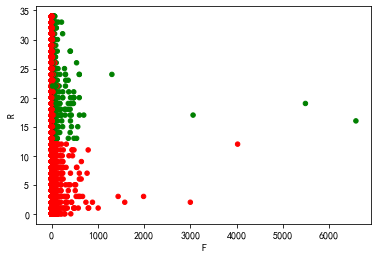

In [38]:
rfm.loc[rfm.label=='重要价值客户','color']='g'
rfm.loc[~(rfm.label=='重要价值客户'),'color']='r'
rfm.plot.scatter('F','R',c= rfm.color)       #从图中可以看出交易频率很高

#### 3.5新用户、活跃用户、不活跃用户和回归用户分析

设置Customer_ID为索引，month为列名，统计每个月的购买次数

In [39]:
pivoted_counts = item_new2.pivot_table(index= 'BASK_CODE',
                               columns= 'month',
                               values= 'SDATE',
                               aggfunc= 'count').fillna(0)
# 大于一次的全部设为1
item_new2_purchase = pivoted_counts.applymap(lambda x:1 if x>0 else 0)
item_6=item_new2_purchase[6]
item_7=item_new2_purchase[7]
item_6.head()

BASK_CODE
961    1
962    1
964    1
965    1
966    1
Name: 6, dtype: int64

In [40]:
def active_status(data):
    status = []
    for i in range(48):
        if data[i] == 0:
            if len(status)>0:
                if status[i-1] == "unreg":
                 # 未注册客户
                    status.append("unreg")
                else:
                 # 不活跃用户
                    status.append("unactive")
            else:
                status.append("unreg")
            
        # 若本月消费了
        else:
            if len(status) == 0:
             # 新用户
                status.append("new")
            else:
                if status[i-1] == "unactive":
                 # 回归用户
                    status.append("return")
                elif status[i-1] == "unreg":
                    status.append("new")
                else:
                    status.append("active")
    return pd.Series(status)  

purchase_stats = item_6.apply(active_status)
purchase_stats.head()

TypeError: 'int' object is not subscriptable